# Spectrogram Data 
## Cocaine study  <br>

### Notes:
* compare regions and waves, find similarity  
* implement in R ?  
* OFC vs multisite data?  
* many ways to setup data...
* Need to run exploratory analysis on variables
* plot, plot, plot 
* pre/post comparison
* run classification model

In [1]:
import os, glob
import seaborn as sns

import pandas as pd
from IPython.core import display as ICD
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use("ggplot")
from sklearn.preprocessing import StandardScaler

%matplotlib inline


In [2]:
!pwd

/Users/nikkibytes/Documents/git_nibl/mouse_dir/Mouse_Data


In [3]:

cwd = os.getcwd()

specto_data_path = '/Users/nikkibytes/Documents/git_nibl/mouse_dir/Spectrogram_data'
#coher_data_path = '/Users/nikkibytes/Documents/git_nibl/Coherence_Data'

#coher_data_files = sorted(glob.glob(os.path.join(coher_data_path, "*")))
#coher_dict = {}

specto_data_files = glob.glob(os.path.join(specto_data_path, "*"))
specto_dict={}
multisite_dict={}
ofc_dict={}


In [4]:
for file in specto_data_files:
    
    file_name = file.split("/")[-1]
    curr_df = pd.read_csv(file)
    mouse_id = file_name.split(" ")[1].split('e')[1]
    
    # add mouse id to dataframes 
    curr_df["mouse_id"] = mouse_id
    specto_dict[file_name] = curr_df

    print("Filename: ", file_name)
    #ICD.display(curr_df.head())
    
    try:
        
        if "OFC-DMS" in file_name:
            ofc_dict[file_name] = curr_df
            #print(curr_df.columns.values)
            #print(file_name)
            #plt.plot(curr_df['Time (s)'], curr_df['OFC1 gamma'])
            #plt.title(file.split("/")[-1])
        else:
            multisite_dict[file_name] = curr_df
            #print(file_name)
            #plt.plot(curr_df['Time (s)'], curr_df['BLA2 gamma'])
            #plt.title(file.split("/")[-1])
    except:
        print("\nDATA FILE: {}\n".format(file.split("/")[-1]))

    
#curr_df.columns.values

Filename:  multisite mouse1 (recording 1) post-cocaine.csv
Filename:  OFC-DMS mouse4 post-cocaine.csv
Filename:  multisite mouse2 (recording 2) pre-cocaine.csv
Filename:  OFC-DMS mouse2 pre-cocaine.csv
Filename:  multisite mouse1 (recording 1) pre-cocaine.csv
Filename:  OFC-DMS mouse4 pre-cocaine.csv
Filename:  multisite mouse1 (recording 2) post-cocaine.csv
Filename:  OFC-DMS mouse3 pre-cocaine.csv
Filename:  OFC-DMS mouse2 post-cocaine.csv
Filename:  multisite mouse2 (recording 2) post-cocaine.csv
Filename:  multisite mouse2 (recording 1) pre-cocaine.csv
Filename:  multisite mouse2 (recording 1) post-cocaine.csv
Filename:  OFC-DMS mouse3 post-cocaine.csv
Filename:  multisite mouse1 (recording 2) pre-cocaine.csv


In [5]:
specto_dict.keys()

dict_keys(['multisite mouse1 (recording 1) post-cocaine.csv', 'OFC-DMS mouse4 post-cocaine.csv', 'multisite mouse2 (recording 2) pre-cocaine.csv', 'OFC-DMS mouse2 pre-cocaine.csv', 'multisite mouse1 (recording 1) pre-cocaine.csv', 'OFC-DMS mouse4 pre-cocaine.csv', 'multisite mouse1 (recording 2) post-cocaine.csv', 'OFC-DMS mouse3 pre-cocaine.csv', 'OFC-DMS mouse2 post-cocaine.csv', 'multisite mouse2 (recording 2) post-cocaine.csv', 'multisite mouse2 (recording 1) pre-cocaine.csv', 'multisite mouse2 (recording 1) post-cocaine.csv', 'OFC-DMS mouse3 post-cocaine.csv', 'multisite mouse1 (recording 2) pre-cocaine.csv'])

In [6]:
ofc_dict.keys()

dict_keys(['OFC-DMS mouse4 post-cocaine.csv', 'OFC-DMS mouse2 pre-cocaine.csv', 'OFC-DMS mouse4 pre-cocaine.csv', 'OFC-DMS mouse3 pre-cocaine.csv', 'OFC-DMS mouse2 post-cocaine.csv', 'OFC-DMS mouse3 post-cocaine.csv'])

In [7]:
multisite_dict.keys()

dict_keys(['multisite mouse1 (recording 1) post-cocaine.csv', 'multisite mouse2 (recording 2) pre-cocaine.csv', 'multisite mouse1 (recording 1) pre-cocaine.csv', 'multisite mouse1 (recording 2) post-cocaine.csv', 'multisite mouse2 (recording 2) post-cocaine.csv', 'multisite mouse2 (recording 1) pre-cocaine.csv', 'multisite mouse2 (recording 1) post-cocaine.csv', 'multisite mouse1 (recording 2) pre-cocaine.csv'])

<br>
We've organized the data into dictionaries and we've added a column for mouse ID.<br>Now lets look at our available column values in multisite date and the OFC data.

In [8]:
multisite_df1 = multisite_dict['multisite mouse1 (recording 1) post-cocaine.csv']
ofc_df1 = ofc_dict['OFC-DMS mouse4 post-cocaine.csv']

In [9]:
multisite_df1.columns.values

array(['Time (s)', 'reference1 theta', 'reference1 beta',
       'reference1 gamma', 'VTA1 theta', 'VTA1 beta', 'VTA1 gamma',
       'VTA2 theta', 'VTA2 beta', 'VTA2 gamma', 'VTA3 theta', 'VTA3 beta',
       'VTA3 gamma', 'BLA1 theta', 'BLA1 beta', 'BLA1 gamma',
       'BLA2 theta', 'BLA2 beta', 'BLA2 gamma', 'BLA3 theta', 'BLA3 beta',
       'BLA3 gamma', 'BLA4 theta', 'BLA4 beta', 'BLA4 gamma',
       'NAc1 theta', 'NAc1 beta', 'NAc1 gamma', 'NAc2 theta', 'NAc2 beta',
       'NAc2 gamma', 'NAc3 theta', 'NAc3 beta', 'NAc3 gamma',
       'NAc4 theta', 'NAc4 beta', 'NAc4 gamma', 'PFC1 theta', 'PFC1 beta',
       'PFC1 gamma', 'PFC2 theta', 'PFC2 beta', 'PFC2 gamma',
       'PFC3 theta', 'PFC3 beta', 'PFC3 gamma', 'PFC4 theta', 'PFC4 beta',
       'PFC4 gamma', 'Speed (cm/s)', 'mouse_id'], dtype=object)

In [10]:
ofc_df1.columns.values

array(['Time (s)', 'OFC1 theta', 'OFC1 beta', 'OFC1 gamma', 'OFC2 theta',
       'OFC2 beta', 'OFC2 gamma', 'OFC3 theta', 'OFC3 beta', 'OFC3 gamma',
       'OFC4 theta', 'OFC4 beta', 'OFC4 gamma', 'OFC5 theta', 'OFC5 beta',
       'OFC5 gamma', 'OFC6 theta', 'OFC6 beta', 'OFC6 gamma',
       'OFC7 theta', 'OFC7 beta', 'OFC7 gamma', 'OFC8 theta', 'OFC8 beta',
       'OFC8 gamma', 'OFC9 theta', 'OFC9 beta', 'OFC9 gamma',
       'OFC10 theta', 'OFC10 beta', 'OFC10 gamma', 'OFC11 theta',
       'OFC11 beta', 'OFC11 gamma', 'OFC12 theta', 'OFC12 beta',
       'OFC12 gamma', 'OFC13 theta', 'OFC13 beta', 'OFC13 gamma',
       'OFC14 theta', 'OFC14 beta', 'OFC14 gamma', 'OFC15 theta',
       'OFC15 beta', 'OFC15 gamma', 'OFC16 theta', 'OFC16 beta',
       'OFC16 gamma', 'DMS1 theta', 'DMS1 beta', 'DMS1 gamma',
       'DMS2 theta', 'DMS2 beta', 'DMS2 gamma', 'DMS3 theta', 'DMS3 beta',
       'DMS3 gamma', 'DMS4 theta', 'DMS4 beta', 'DMS4 gamma',
       'DMS5 theta', 'DMS5 beta', 'DMS5 gamma', '

We see we each dataset has gamma, theta, and beta waves, a speed value, time value, and our added mouse id. The multisite has a reference value as well. <br>
Now we will start with the multisite data, and find any similarity in our waves.

Lets start with looking at 'pre-cocaine' data:

In [11]:
pre_concat_list = []
for key in multisite_dict:
    if "pre-cocaine" in key:
        pre_concat_list.append(multisite_dict[key])

In [12]:
pre_multi_df = pd.concat(pre_concat_list, ignore_index=True,sort=False)

In [13]:
#pre_concat_df.tail(50)

In [14]:
#df1.columns.values
gamma_cols = [x for x in pre_multi_df.columns.values if "gamma" in x]
theta_cols = [x for x in pre_multi_df.columns.values if "theta" in x]
beta_cols  = [x for x in pre_multi_df.columns.values if "beta" in x]


In [15]:
gamma_corr = pre_multi_df[gamma_cols].corr().abs().unstack().sort_values(kind="quicksort")
top_gamma_corrs=[]
for i,s in enumerate(gamma_corr):
    if s > 0.7 and s < 1.0:
        top_gamma_corrs.append(i)

In [16]:
#gamma_corr[top_gamma_corrs[0]:top_gamma_corrs[-1]]

In [17]:
beta_corr = pre_multi_df[beta_cols].corr().abs().unstack().sort_values(kind="quicksort")
#beta_corr
top_beta_corrs=[]
for i,s in enumerate(beta_corr):
    if s > 0.5 and s < 1.0:
        top_beta_corrs.append(i)

In [18]:
#beta_corr[top_beta_corrs[0]:top_beta_corrs[-1]]

In [19]:
theta_corr = pre_multi_df[theta_cols].corr().abs().unstack().sort_values(kind="quicksort")
#beta_corr
top_theta_corrs=[]
for i,s in enumerate(theta_corr):
    if s > 0.5 and s < 1.0:
        top_theta_corrs.append(i)

In [20]:
#theta_corr[top_theta_corrs[0]:top_theta_corrs[-1]]

In [21]:
pre_multi_corr = pre_multi_df.corr().abs().unstack().sort_values(kind="quicksort")
#beta_corr
top_multi_corrs=[]
for i,s in enumerate(pre_multi_corr):
    if s > 0.7 and s < 1.0:
        top_multi_corrs.append(i)

In [22]:
pre_multi_corr[top_multi_corrs[0]:top_multi_corrs[-1]]

PFC3 gamma        PFC4 gamma          0.701009
PFC4 gamma        PFC3 gamma          0.701009
BLA1 gamma        BLA1 beta           0.708068
BLA1 beta         BLA1 gamma          0.708068
VTA4 gamma        BLA4 gamma          0.723139
BLA4 gamma        VTA4 gamma          0.723139
VTA2 gamma        VTA2 beta           0.729464
VTA2 beta         VTA2 gamma          0.729464
VTA4 gamma        BLA4 beta           0.730312
BLA4 beta         VTA4 gamma          0.730312
BLA4 theta        VTA4 gamma          0.730614
VTA4 gamma        BLA4 theta          0.730614
                  VTA4 beta           0.737691
VTA4 beta         VTA4 gamma          0.737691
NAc1 theta        NAc1 gamma          0.957931
NAc1 gamma        NAc1 theta          0.957931
NAc1 beta         NAc1 theta          0.961148
NAc1 theta        NAc1 beta           0.961148
reference1 gamma  reference1 theta    0.965723
reference1 theta  reference1 gamma    0.965723
reference1 beta   reference1 theta    0.976950
reference1 th

In [23]:
post_concat_list = []
for key in multisite_dict:
    if "post-cocaine" in key:
        post_concat_list.append(multisite_dict[key])

In [24]:
post_multi_df = pd.concat(post_concat_list, ignore_index=True,sort=False)

In [25]:
post_multi_corr = post_multi_df.corr().abs().unstack().sort_values(kind="quicksort")
top_post_multi_corrs=[]
for i,s in enumerate(post_multi_corr):
    if s > 0.8 and s < 1.0:
        top_post_multi_corrs.append(i)

In [26]:
post_multi_corr[top_post_multi_corrs[0]:top_post_multi_corrs[-1]]

PFC3 gamma        BLA4 theta          0.817573
BLA4 theta        PFC3 gamma          0.817573
PFC3 gamma        BLA4 beta           0.820464
BLA4 beta         PFC3 gamma          0.820464
PFC2 gamma        BLA4 theta          0.822392
BLA4 theta        PFC2 gamma          0.822392
                  PFC4 gamma          0.823380
PFC4 gamma        BLA4 theta          0.823380
PFC2 gamma        BLA4 beta           0.823666
BLA4 beta         PFC2 gamma          0.823666
PFC3 gamma        BLA4 gamma          0.825624
BLA4 gamma        PFC3 gamma          0.825624
BLA4 beta         PFC4 gamma          0.826221
PFC4 gamma        BLA4 beta           0.826221
PFC2 gamma        BLA4 gamma          0.828845
BLA4 gamma        PFC2 gamma          0.828845
                  PFC4 gamma          0.830219
PFC4 gamma        BLA4 gamma          0.830219
VTA4 gamma        VTA4 beta           0.856019
VTA4 beta         VTA4 gamma          0.856019
NAc1 theta        NAc1 gamma          0.954840
NAc1 gamma   

In [27]:
multi_concat_list = []
for key in multisite_dict:
    multi_concat_list.append(multisite_dict[key])

In [28]:
multi_df = pd.concat(multi_concat_list, ignore_index=True,sort=False)

In [40]:
multi_corr = multi_df.corr().unstack().sort_values(kind="quicksort")
top_multi_corrs=[]
for i,s in enumerate(multi_corr):
    if s > 0.8 and s < 1.0:
        top_multi_corrs.append(i)

In [41]:
multi_corr[top_multi_corrs[0]:top_multi_corrs[-1]]

VTA4 beta         VTA4 gamma          0.808680
VTA4 gamma        VTA4 beta           0.808680
NAc1 gamma        NAc1 theta          0.955500
NAc1 theta        NAc1 gamma          0.955500
NAc1 beta         NAc1 theta          0.959492
NAc1 theta        NAc1 beta           0.959492
reference1 gamma  reference1 theta    0.969091
reference1 theta  reference1 gamma    0.969091
NAc1 beta         NAc1 gamma          0.976928
NAc1 gamma        NAc1 beta           0.976928
reference1 beta   reference1 theta    0.977518
reference1 theta  reference1 beta     0.977518
reference1 beta   reference1 gamma    0.983336
reference1 gamma  reference1 beta     0.983336
BLA4 theta        BLA4 beta           0.985612
BLA4 beta         BLA4 theta          0.985612
BLA4 gamma        BLA4 theta          0.988365
BLA4 theta        BLA4 gamma          0.988365
BLA4 beta         BLA4 gamma          0.993835
dtype: float64

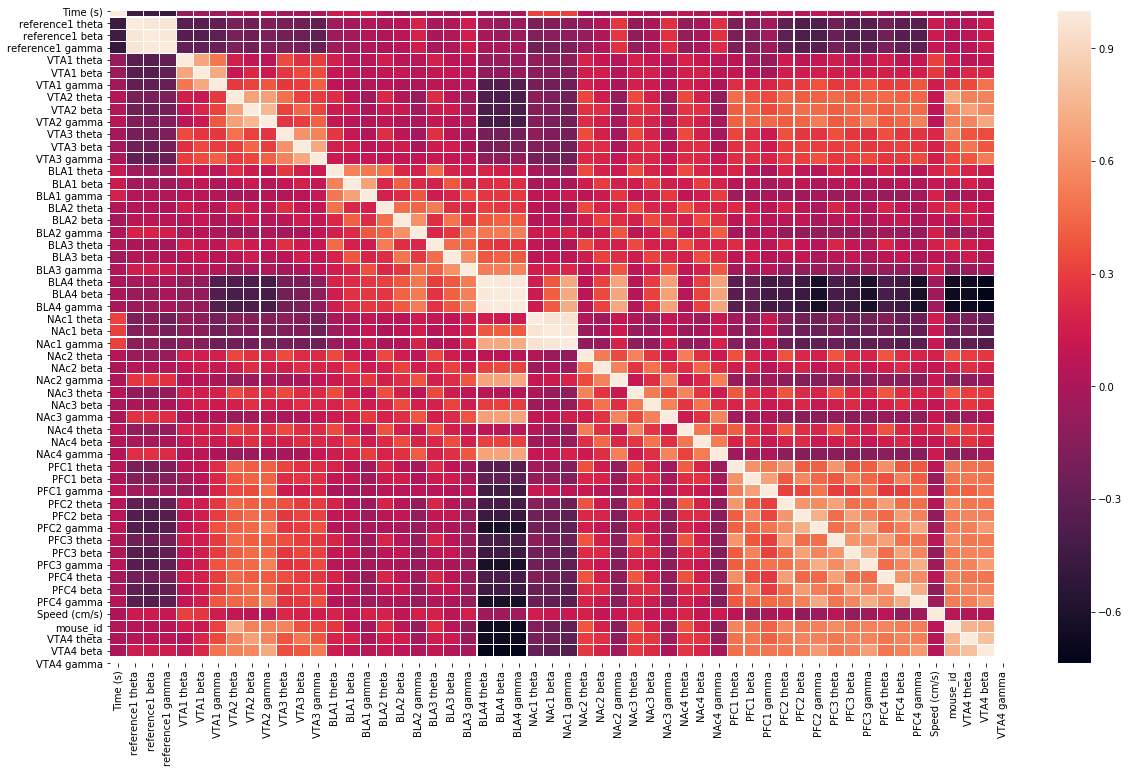

In [31]:
plt.figure(figsize=(20,12))

sns.heatmap(multi_df.corr(), 
            xticklabels=multi_df.columns,
            yticklabels=multi_df.columns,linewidths=.09)
            #cmap='RdBu_r')
#annot=True,
            

In [39]:
post_multi_df.corrwith(pre_multi_df, axis=0).sort_values()

PFC1 beta          -0.366826
PFC2 beta          -0.338239
PFC4 beta          -0.330802
PFC3 beta          -0.329986
VTA2 gamma         -0.325371
PFC4 gamma         -0.318269
VTA4 gamma         -0.316000
PFC3 gamma         -0.315150
PFC2 gamma         -0.303434
PFC1 gamma         -0.288339
VTA2 beta          -0.268170
VTA4 beta          -0.258339
PFC1 theta         -0.243156
PFC3 theta         -0.207414
PFC4 theta         -0.202243
PFC2 theta         -0.199013
VTA2 theta         -0.187147
VTA4 theta         -0.176813
BLA4 theta         -0.139165
NAc1 theta         -0.114711
VTA3 gamma         -0.103627
NAc1 beta          -0.094492
VTA3 beta          -0.083518
NAc1 gamma         -0.071412
VTA1 gamma         -0.056391
NAc2 theta         -0.046874
NAc4 theta         -0.034841
NAc3 theta         -0.027023
VTA3 theta         -0.024419
VTA1 beta          -0.020674
NAc3 beta          -0.014079
BLA3 theta         -0.010985
VTA1 theta         -0.006941
Speed (cm/s)       -0.002198
BLA4 beta     

In [33]:
sns.set(rc={'figure.figsize':(11, 4)})


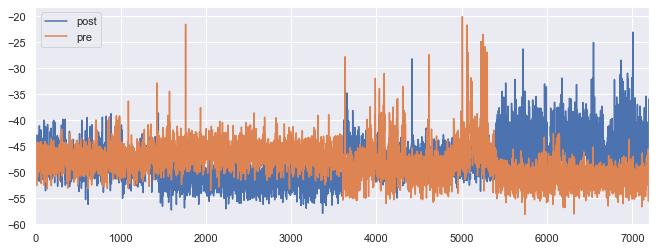

In [49]:
ax = post_multi_df['PFC1 beta'].plot(label='post')
pre_multi_df['PFC1 beta'].plot(ax=ax, label='pre')
leg = ax.legend();

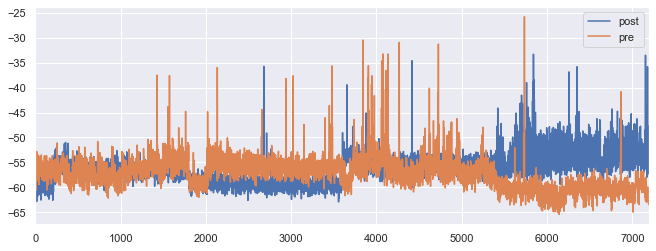

In [51]:
ax = post_multi_df['VTA2 gamma'].plot(label='post')
pre_multi_df['VTA2 gamma'].plot(ax=ax, label='pre')
leg = ax.legend();

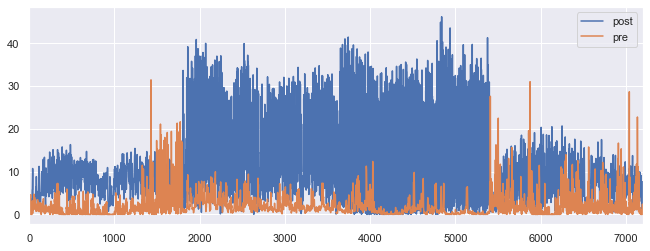

In [62]:
ax = post_multi_df['Speed (cm/s)'].plot(label='post')
pre_multi_df['Speed (cm/s)'].plot(ax=ax, label='pre')
leg = ax.legend();


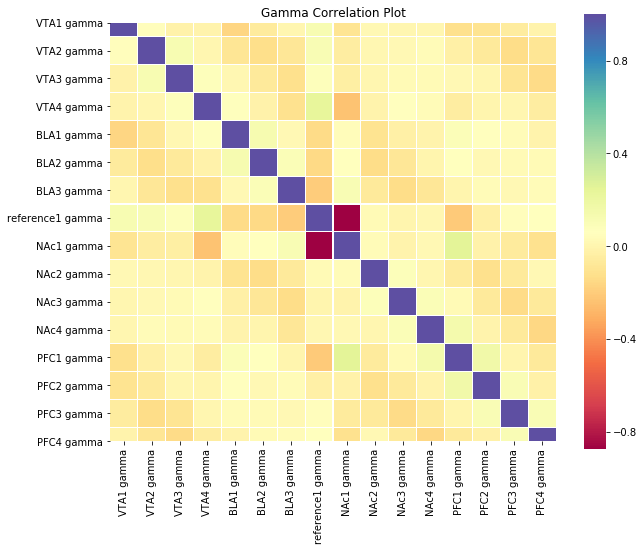

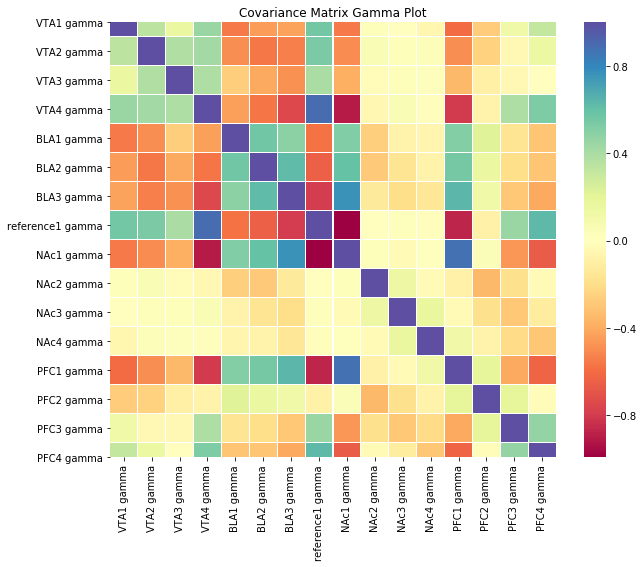

In [12]:

f, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Gamma Correlation Plot')
corr = df1[gamma_cols].corr()
sns.heatmap(corr, cmap="Spectral",linewidths=.1, linecolor='white', mask=np.zeros_like(corr, dtype=np.bool),
            square=True, ax=ax)


f, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Covariance Matrix Gamma Plot')
sns.heatmap(np.corrcoef(df1[gamma_cols].cov().values),cmap="Spectral",linewidths=.1, linecolor='white', yticklabels = gamma_cols, xticklabels = gamma_cols, ax=ax)

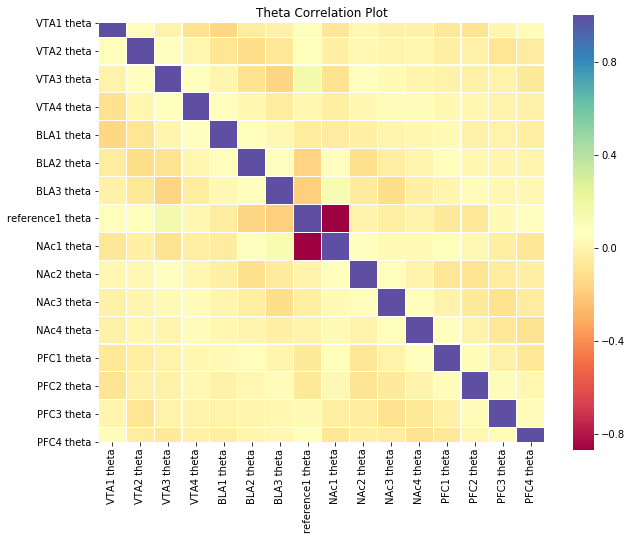

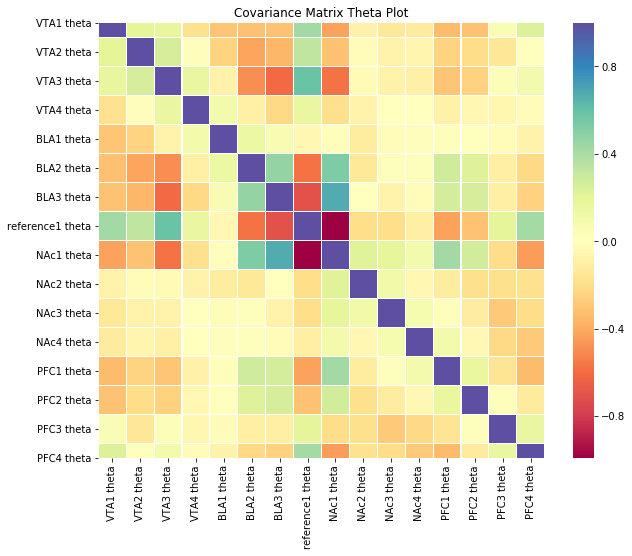

In [13]:

f, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Theta Correlation Plot')
corr = df1[theta_cols].corr()
sns.heatmap(corr, cmap="Spectral",linewidths=.1, linecolor='white', mask=np.zeros_like(corr, dtype=np.bool),
            square=True, ax=ax)


f, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Covariance Matrix Theta Plot')
sns.heatmap(np.corrcoef(df1[theta_cols].cov().values),cmap="Spectral",linewidths=.1, yticklabels = theta_cols, xticklabels = theta_cols, linecolor='white', ax=ax)

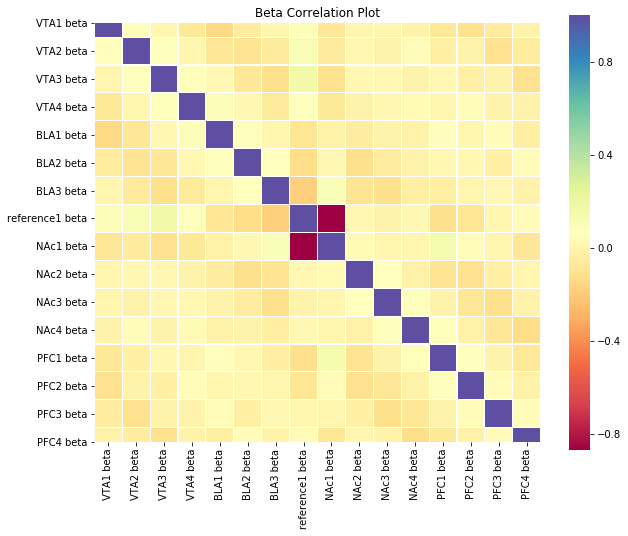

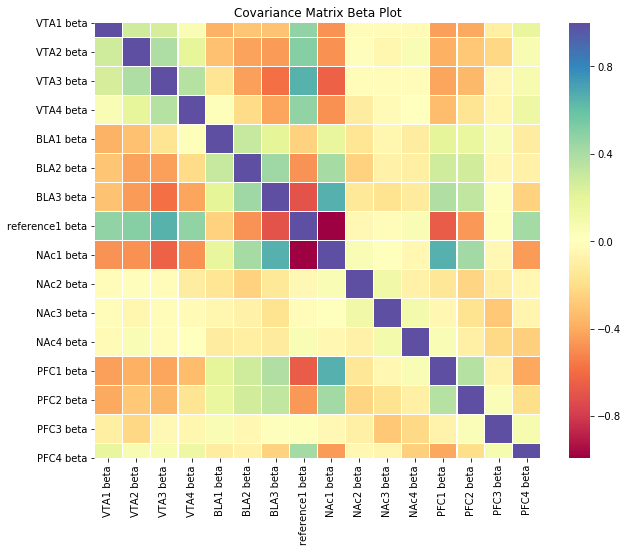

In [14]:

f, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Beta Correlation Plot')
corr = df1[beta_cols].corr()
sns.heatmap(corr, cmap="Spectral",linewidths=.1, linecolor='white', mask=np.zeros_like(corr, dtype=np.bool),
            square=True, ax=ax)


f, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Covariance Matrix Beta Plot')
sns.heatmap(np.corrcoef(df1[beta_cols].cov().values),cmap="Spectral",linewidths=.1, linecolor='white',yticklabels = beta_cols, xticklabels = beta_cols, ax=ax)


### References: 
https://www.geeksforgeeks.org/principal-component-analysis-with-python/  
https://mne.tools/dev/auto_tutorials/intro/plot_10_overview.htmlhttps://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#3.-Keep-calm-and-work-smart  
https://stackoverflow.com/questions/51182476/interpretation-of-covariance-result-matrix  
https://pythontic.com/visualization/signals/spectrogram  
https://www.analyticsvidhya.com/blog/2018/09/introduction-graph-theory-applications-python/
https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial
https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22  
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60  
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
http://compneurosci.com/wiki/images/4/42/Intro_to_PCA_and_ICA.pdf  